In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\joy\Documents\EDA_Projects\datasets\zomato.csv")
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [3]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
df = df.drop(columns=['url','address','reviews_list','menu_item'])

In [79]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'phone',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'numeric_rate'],
      dtype='object')

***Total Count of Restaurants***

In [78]:
print(f"Total Count of Restaurants: {len(df['name'].unique())}")

Total Count of Restaurants: 8792


***Top 20 restaurants with max number of votes***

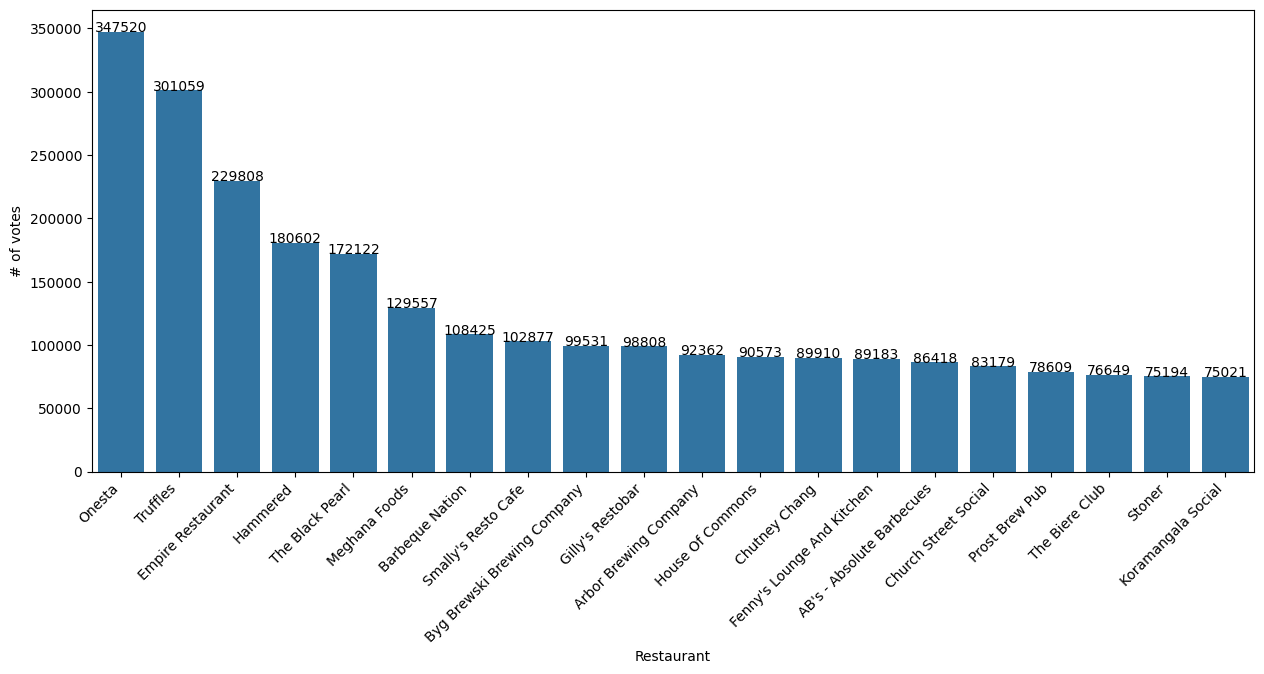

In [61]:
rest_vote = df[['name','votes']]
rest_vote

rest_vote_grp = df.groupby('name')['votes'].sum().reset_index()
rest_vote_grp = rest_vote_grp.sort_values('votes', ascending=False).head(20)
# print(rest_vote_grp)
vote_count = rest_vote_grp['votes'].head(20)

plt.figure(figsize=(15,6))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Restaurant')
plt.ylabel('# of votes')
sns.barplot(x = rest_vote_grp['name'], y = rest_vote_grp['votes'])
for index, value in enumerate(vote_count):
    plt.text(index, value, str(value), ha='center')

***Average Restaurant Rating***

In [7]:
df['rate'].info()
df['rate'].isna().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: rate
Non-Null Count  Dtype 
--------------  ----- 
43942 non-null  object
dtypes: object(1)
memory usage: 404.2+ KB


7775

In [8]:
# out of 51717 entries, 7775 are NaN which means approximately 15% values are NaN. This means that 85%(43942) of data is available and on 
# the basis of those 43942 values, data analysis has been performed.

# Extracting numerical ratings 
df['numeric_rate'] = df['rate'].str.extract(r'^(\d+\.\d+)', expand=False)
df['numeric_rate']

# Convert 'numeric_rate' column to numeric type
df['numeric_rate'] = pd.to_numeric(df['numeric_rate'], errors='coerce')
average_rating = df['numeric_rate'].mean()
print(f"Average Restaurant Rating: {average_rating}")

Average Restaurant Rating: 3.700448817952718


***Votes vs Ratings Comparison of the top 20 restaurants***

In [9]:
grouped_data = df.groupby('name').agg({
    'votes': 'sum',             # Summing up votes
    'numeric_rate': 'mean'      # Calculating mean rating
}).reset_index()

grouped_data.sort_values('votes', ascending=False).head(30)

sorted_top_restaurants = grouped_data.sort_values('votes', ascending=False).head(20)

print(sorted_top_restaurants)

                             name   votes  numeric_rate
5549                       Onesta  347520      4.410588
8269                     Truffles  301059      4.595349
2446            Empire Restaurant  229808      4.030435
3054                     Hammered  180602      4.625000
7751              The Black Pearl  172122      4.727778
4789                Meghana Foods  129557      4.343333
806               Barbeque Nation  108425      4.492683
6906          Smally's Resto Cafe  102877      4.172222
1274  Byg Brewski Brewing Company   99531      4.900000
2851             Gilly's Restobar   98808      4.462500
548         Arbor Brewing Company   92362      4.500000
3413             House Of Commons   90573      4.723810
1816                Chutney Chang   89910      4.165217
2537   Fenny's Lounge And Kitchen   89183      4.521429
129     AB's - Absolute Barbecues   86418      4.789474
1812         Church Street Social   83179      4.300000
5907               Prost Brew Pub   78609      4

<Figure size 2000x1000 with 0 Axes>

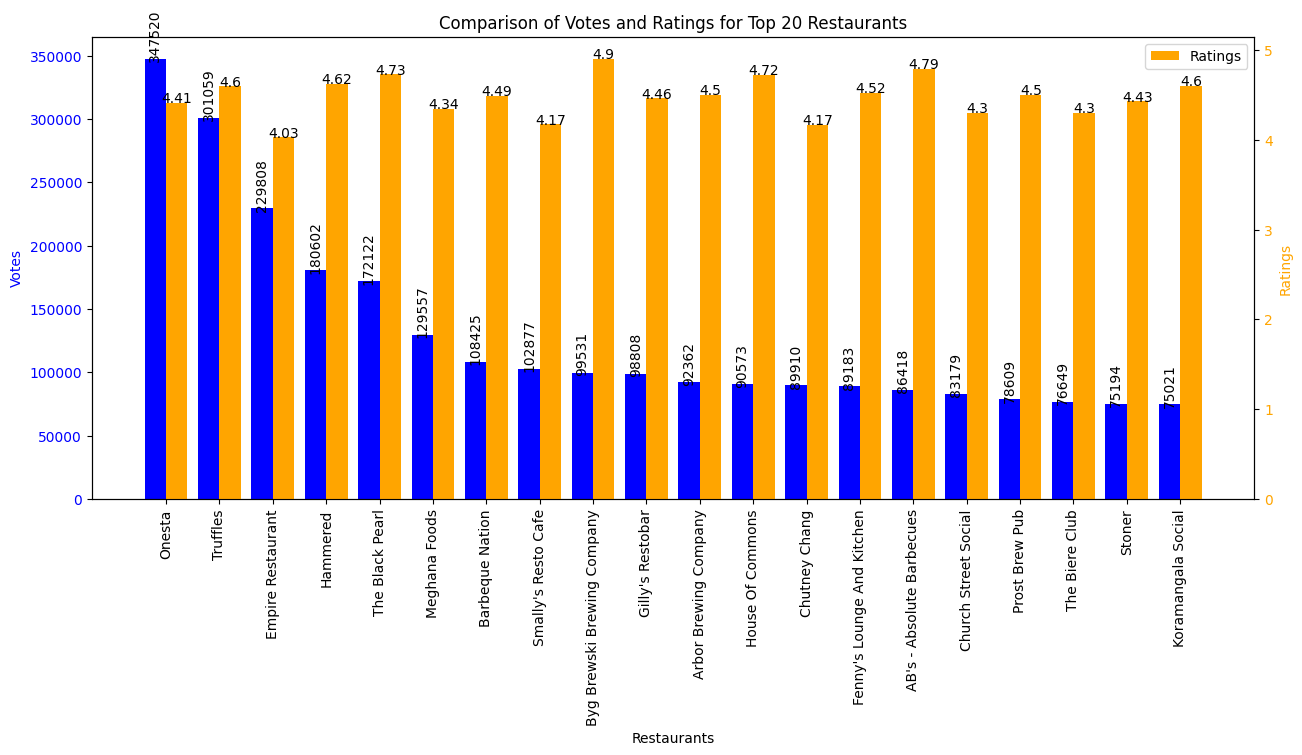

In [10]:
plt.figure(figsize=(20,10))

# Create figure and twin axes
fig, ax1 = plt.subplots(figsize=(15, 6))

# Bar plot for 'votes' on primary y-axis
bar_width = 0.4
x = range(len(sorted_top_restaurants))
x1 = [i + bar_width for i in x]
ax1.bar(x, sorted_top_restaurants['votes'], width=bar_width, color='blue', align='center', label='Votes')
for index, value in zip(x,sorted_top_restaurants['votes']):
    plt.text(index, value, round(value,2), ha='center', size=10,rotation=90)
ax1.set_xlabel('Restaurants')
plt.xticks([i + bar_width / 2 for i in x], sorted_top_restaurants['name'], rotation=90, ha='center')
ax1.set_ylabel('Votes', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

restaurant_rate = sorted_top_restaurants['numeric_rate']

# Twin the x-axis for second y-axis
ax2 = ax1.twinx()

# Bar plot for 'ratings' on secondary y-axis
ax2.bar(x1, sorted_top_restaurants['numeric_rate'], width=bar_width, color='orange', align='center', label='Ratings')
ax2.set_ylabel('Ratings', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
for index, value in zip(x1,sorted_top_restaurants['numeric_rate']):
    plt.text(index, value, round(value,2), ha='center', size=10)

# X-axis labels and legend
plt.title('Comparison of Votes and Ratings for Top 20 Restaurants')
plt.legend()
plt.show()


***Restaurant Type Count***

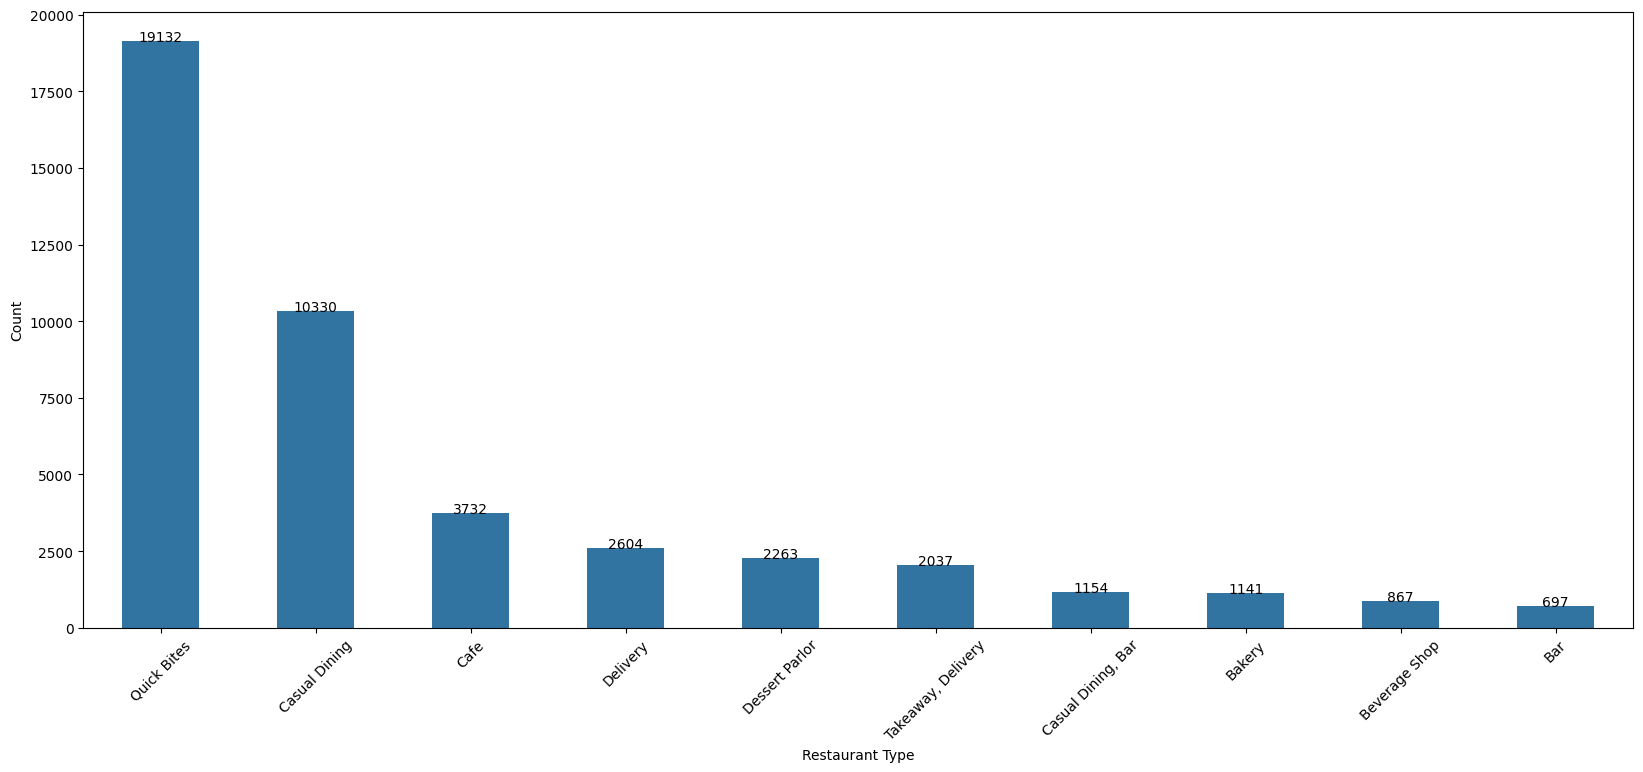

In [58]:
order=df['rest_type'].value_counts().index
ordercount = df['rest_type'].value_counts().head(10)
ord_index = ordercount.index
plt.figure(figsize=(20,8))
plt.xticks(ha='center',rotation=45)
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
sns.barplot(x = ord_index, y=ordercount,width=0.5)
for index, value in enumerate(ordercount):
    plt.text(index, value, str(value), ha='center')

***Popular Cuisines offered by the restaurants***

Index(['North Indian', 'North Indian, Chinese', 'South Indian', 'Biryani',
       'Bakery, Desserts', 'Fast Food', 'Desserts', 'Cafe',
       'South Indian, North Indian, Chinese', 'Bakery',
       ...
       'Biryani, North Indian, Chinese, Kebab',
       'North Indian, Fast Food, Desserts, Beverages',
       'Oriya, South Indian, Fast Food',
       'North Indian, Arabian, Chinese, Juices, Beverages, Desserts',
       'North Indian, South Indian, Street Food, Chinese',
       'North Indian, Chinese, South Indian, Juices',
       'North Indian, Chinese, Kebab, Mughlai',
       'Chinese, Vietnamese, Thai, Malaysian',
       'Arabian, Lebanese, Chinese, Rolls',
       'North Indian, Chinese, Arabian, Momos'],
      dtype='object', name='cuisines', length=2723)


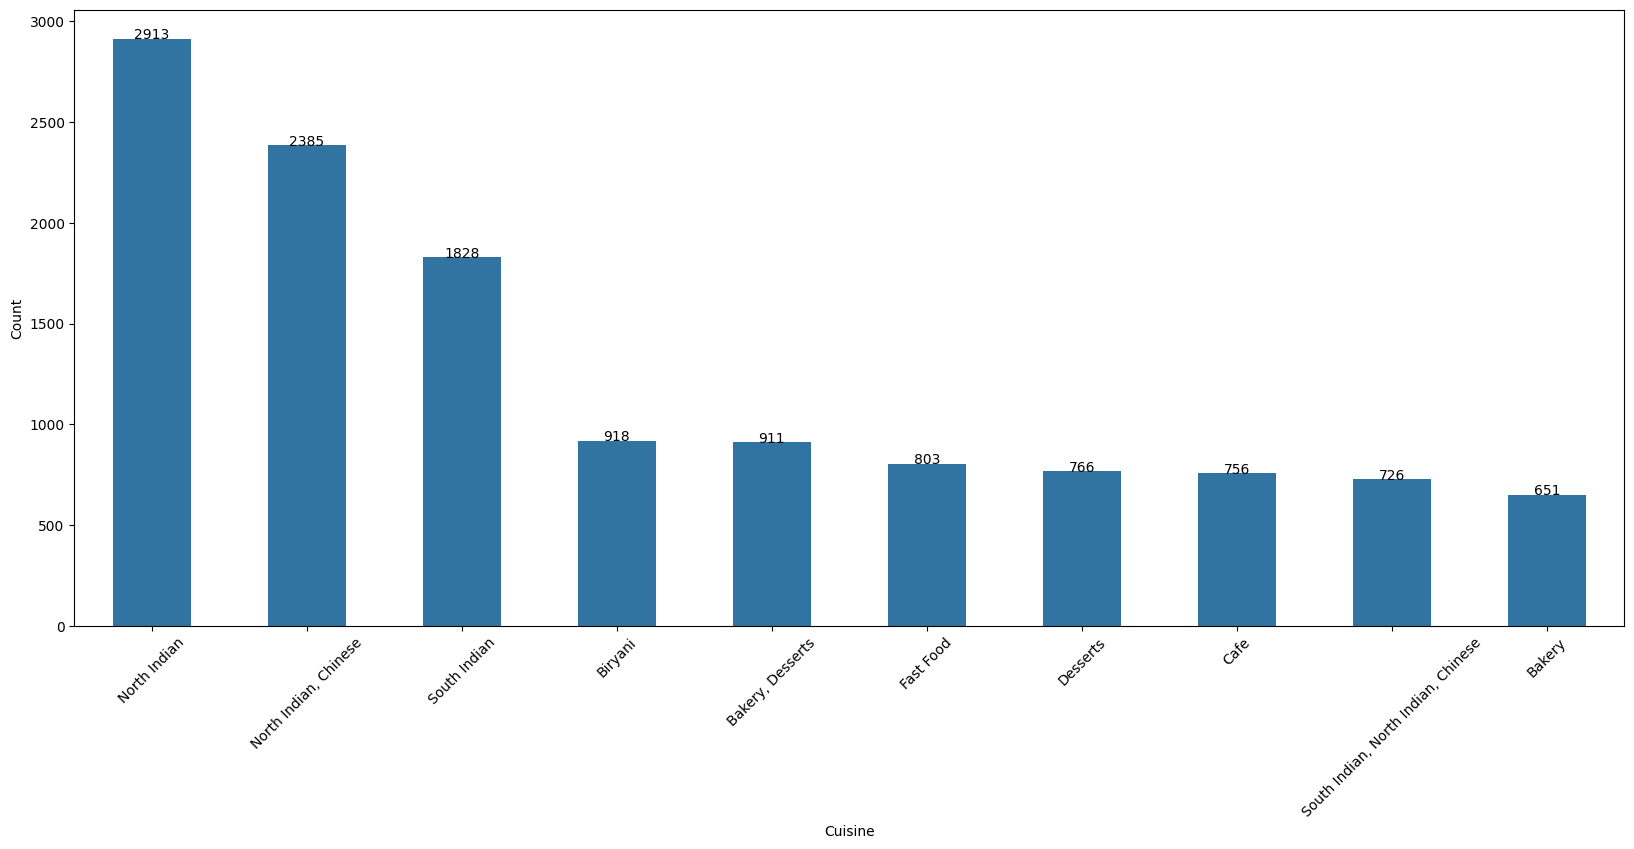

In [70]:
cuisine=df['cuisines'].value_counts().index.unique()
print(cuisine)
cus_count = df['cuisines'].value_counts().head(10)
cus_index = cus_count.index
plt.figure(figsize=(20,8))
plt.xticks(ha='center',rotation=45)
plt.xlabel('Cuisine')
plt.ylabel('Count')
sns.barplot(x = cus_index, y=cus_count,width=0.5)
for index, value in enumerate(cus_count):
    plt.text(index, value, str(value), ha='center')

***Location wise Restaurant Distribution***

In [87]:
len(df['location'].unique())

94

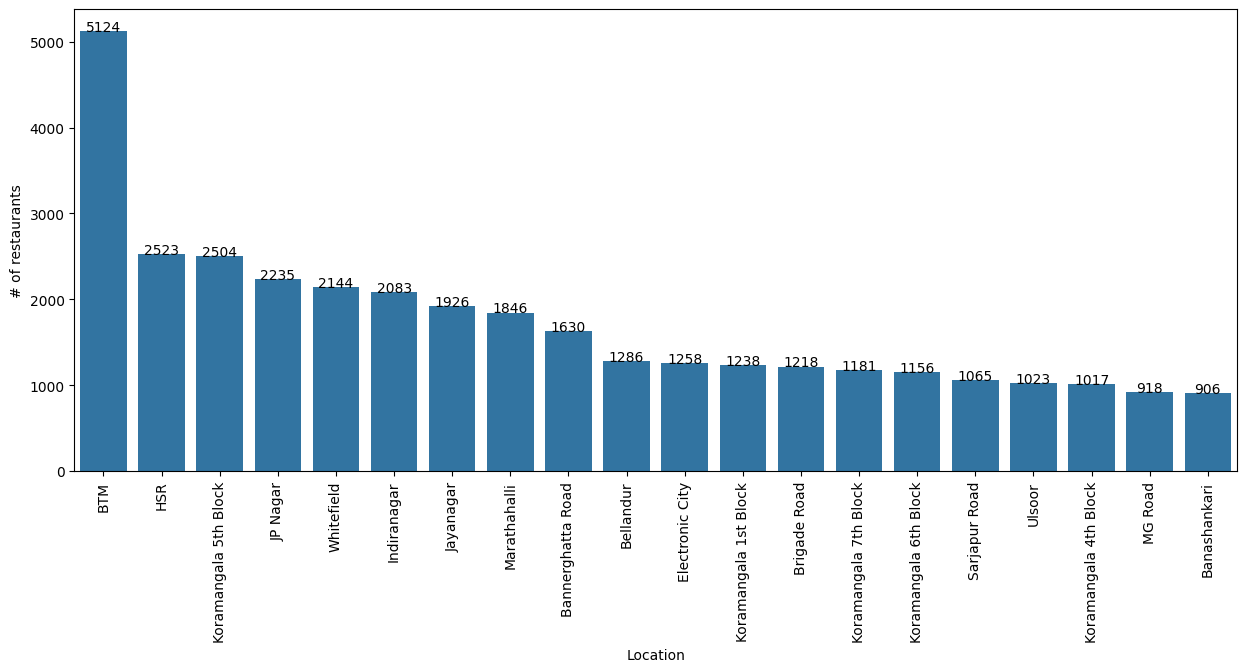

In [161]:
loc = df['location'].value_counts()

loc_data = loc.head(20)
ind = loc_data.index
val = loc_data.values

plt.figure(figsize=(15,6))
sns.barplot(x = ind, y = val)
plt.ylabel('# of restaurants')
plt.xlabel('Location')
plt.xticks(rotation=90)

for index, value in enumerate(val):
    plt.text(index, value, str(value), ha='center')

***Cost for two people Distribution (in Rs.)***

<Axes: xlabel='Cost for two people (in Rs.)', ylabel='# of restaurants'>

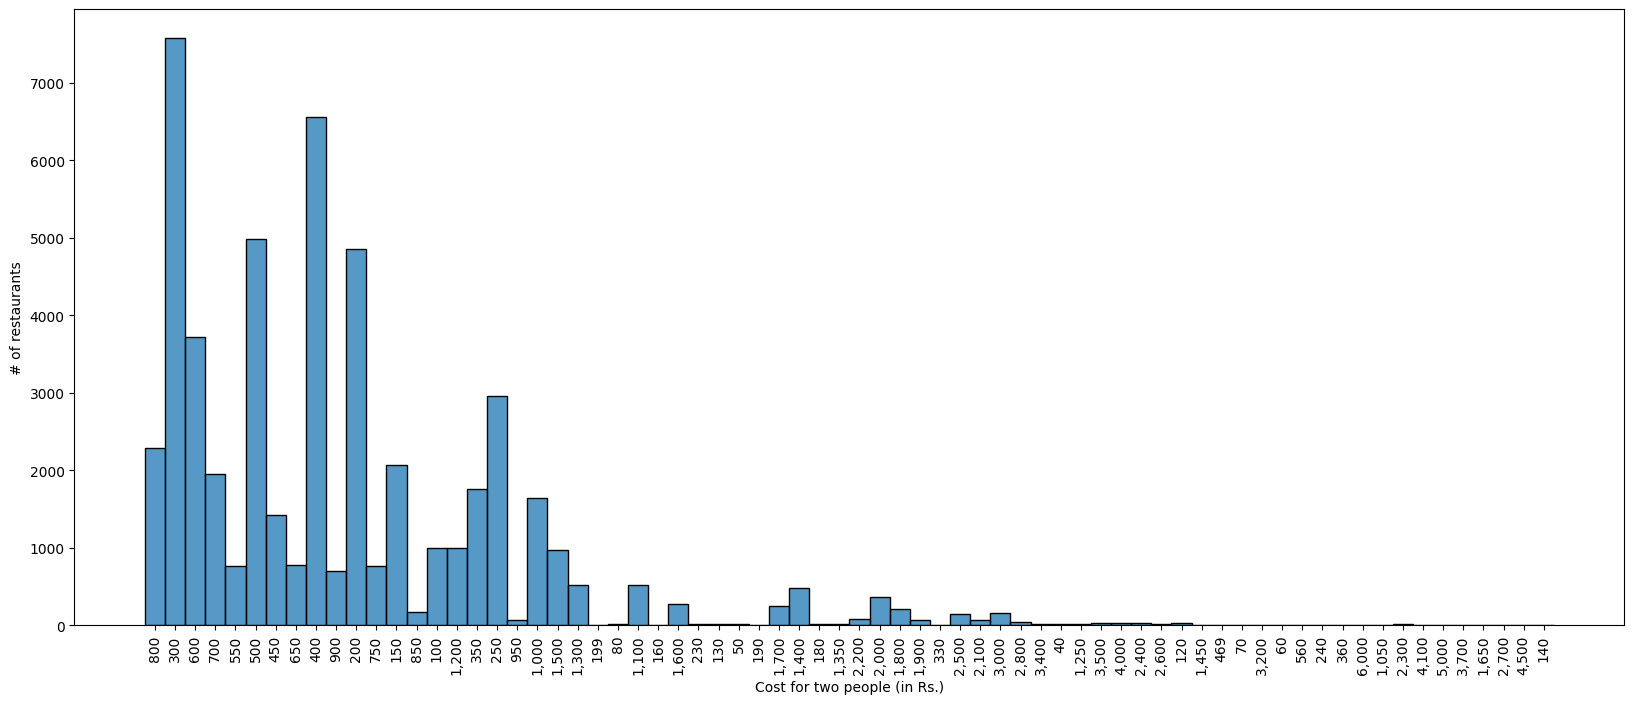

In [253]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.xlabel('Cost for two people (in Rs.)')
plt.ylabel('# of restaurants')
sns.histplot(data = df, x = "approx_cost(for two people)")

***Restaurant Listing type Distribution***

In [273]:
listed_in_type = df['listed_in(type)'].value_counts()
print(listed_in_type)
listed_in_val = listed_in_type.values
listed_in_label = listed_in_type.index



listed_in(type)
Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x1c3f3875b50>,
 [Text(-0.005579531584777981, 1.0999858493759338, 'Delivery'),
  Text(-0.5085925544829197, -0.9753633238565711, 'Dine-out'),
  Text(0.802463575008303, -0.7523644135556211, 'Desserts'),
  Text(0.9997418116133743, -0.4588205641773357, 'Cafes'),
  Text(1.0633910642068098, -0.28142395876170273, 'Drinks & nightlife'),
  Text(1.089503413571791, -0.15159918144704948, 'Buffet'),
  Text(1.099014184816523, -0.046559870833945485, 'Pubs and bars')],
 [Text(-0.003043380864424353, 0.599992281477782, '50%'),
  Text(-0.2774141206270471, -0.5320163584672205, '34%'),
  Text(0.4377074045499834, -0.410380589212157, '7%'),
  Text(0.5453137154254768, -0.25026576227854674, '3%'),
  Text(0.5800314895673507, -0.1535039775063833, '2%'),
  Text(0.5942745892209768, -0.08269046260748152, '2%'),
  Text(0.5994622826271943, -0.02539629318215208, '1%')])

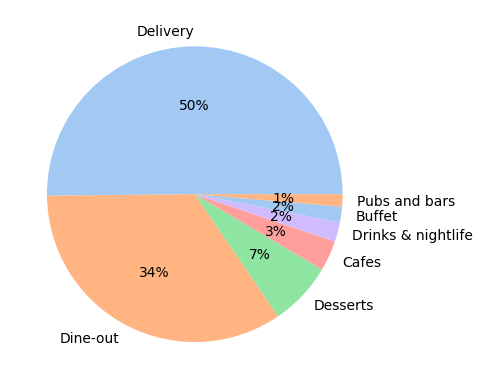

In [272]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(listed_in_val,labels = listed_in_label, colors = colors,autopct='%.0f%%')

*Insights*
1. A total of **8792** restaurants have been listed on Zomato in Bengaluru.
1. **Onesta** has received the maximum number of votes (**347520**). The ratings average for this restaurant is **4.41**.
2. Average Rating of all the restaurants from given dataset is **3.7/5**.
3. Amongst the the **top 20 restaurants** which have gained the maximum number of votes, **Byg Brewski Brewing Company** has gained the best rating (4.9). **Empire Restaurant** has the lowest rating in this group (4.03)
4. There are about **93** different restaurant types available. **Quick Bites** type of restaurants are the most common one on Zomato having a total count of about **19132**.
5. Most popular cuisine offered by the restaurants on Zomato is **North Indian**. About **2913** restaurants are listed as North Indian Cuisine restaurant. The other cuisines offered by the restaurants include Chinese, South Indian, Biryani, Bakery, Desserts, Fast Food, Dessert.
6. The 8792 restaurants are spread out across a total of **94** locations. Of the 94 locations, **BTM** is the most popular location which contains about **5124** restaurants, followed by **HSR**(2523) and **Kormangala 5th Block**(2504).
7. **More than 7000** restaurants have an approx cost for two people as Rs.300 followed by more than **6000** restaurants having an approx. cost of Rs.400.
8. About **50%**(25942) of the retaurants have been listed as **Delivery** and **34%**(17779) of restaurants have been listed as **Dine-out**. The remaining have been listed as Desserts, Cafes, Drinks and nighlife, Pubs and Bars, Buffet.*